<a href="https://colab.research.google.com/github/xavleroy/Custom-Object-Detection-using-Darkflow/blob/master/Object_detection_0307.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydrive
!git clone https://github.com/thtrieu/darkflow.git
!pip install Cython 
!pip install pytube
!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive
Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 58.32 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.


In [0]:
# Run this cell to mount your Google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
os.chdir('/content/darkflow')
!pwd

/content/darkflow


In [3]:
!pip install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [0]:
import pydrive
import time
from tqdm import tqdm
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#4/ewENAKxC5hGZCu51ArwJuKYFmelBwVgi7NUcuNCmBTcohkVfDq6hhp4

In [5]:

#si bin n'existe pas le créer Vérifier avec Files
newdir = 'bin'
os.mkdir(newdir)
!ls -l

total 14920
drwxr-xr-x 2 root root     4096 Jul  3 16:11 bin
drwxr-xr-x 4 root root     4096 Jul  3 16:09 build
drwxr-xr-x 4 root root     4096 Jul  3 16:09 cfg
drwxr-xr-x 7 root root     4096 Jul  3 16:09 darkflow
drwxr-xr-x 2 root root     4096 Jul  3 16:09 darkflow.egg-info
-rw-r--r-- 1 root root 14900940 Jul  3 16:09 demo.gif
-rwxr-xr-x 1 root root       94 Jul  3 16:09 flow
-rw-r--r-- 1 root root       27 Jul  3 16:09 labels.txt
-rw-r--r-- 1 root root    35141 Jul  3 16:09 LICENSE
-rw-r--r-- 1 root root   283380 Jul  3 16:09 preview.png
-rw-r--r-- 1 root root    11539 Jul  3 16:09 README.md
drwxr-xr-x 2 root root     4096 Jul  3 16:09 sample_img
-rw-r--r-- 1 root root     2575 Jul  3 16:09 setup.py
drwxr-xr-x 3 root root     4096 Jul  3 16:09 test


In [0]:
download = drive.CreateFile({'id': '1J-GZ6mvhu12j19zZtq9fTbnyJeCgxE0g'}) # insert the fild ID here
download.GetContentFile('/content/darkflow/bin/yolov2.weights')

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cv2
from darkflow.net.build import TFNet



W0703 16:12:29.948006 139919549261696 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0703 16:12:29.949256 139919549261696 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0703 16:12:29.952647 139919549261696 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0703 16:12:29.954237 139919549261696 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0703 16:12:29.956054 139919549261696 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/buil

In [12]:
#%cd /content/darkflow/bin/images
!mkdir /content/darkflow/bin/images/
!mkdir /content/darkflow/bin/annotations/
!ls -l

mkdir: cannot create directory ‘/content/darkflow/bin/images/’: File exists
total 14920
drwxr-xr-x 5 root root     4096 Jul  3 16:21 bin
drwxr-xr-x 4 root root     4096 Jul  3 16:09 build
drwxr-xr-x 4 root root     4096 Jul  3 16:09 cfg
drwxr-xr-x 7 root root     4096 Jul  3 16:09 darkflow
drwxr-xr-x 2 root root     4096 Jul  3 16:09 darkflow.egg-info
-rw-r--r-- 1 root root 14900940 Jul  3 16:09 demo.gif
-rwxr-xr-x 1 root root       94 Jul  3 16:09 flow
-rw-r--r-- 1 root root       27 Jul  3 16:09 labels.txt
-rw-r--r-- 1 root root    35141 Jul  3 16:09 LICENSE
-rw-r--r-- 1 root root   283380 Jul  3 16:09 preview.png
-rw-r--r-- 1 root root    11539 Jul  3 16:09 README.md
drwxr-xr-x 2 root root     4096 Jul  3 16:09 sample_img
-rw-r--r-- 1 root root     2575 Jul  3 16:09 setup.py
drwxr-xr-x 3 root root     4096 Jul  3 16:09 test


In [13]:
options = {"model": "cfg/yolo.cfg", 
           "load": "bin/yolov2.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/"}
           
tfnet = TFNet(options)

/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.01786184310913086s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [0]:
"#options = {
  #  'model': 'cfg/yolo.cfg',
  #  'load': 'bin/yolov2.weights',
   # 'threshold': 0.3,
   # 'gpu' : 1.0
          }
#tfnet = TFNet(options)

/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.021573543548583984s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

In [14]:
from google.colab import files
file = files.upload()

Saving before.png to before.png


In [15]:
import pprint as pp

original_img = cv2.imread("before.png")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(original_img)

pp.pprint(results)
# l'instruction précédente est le "moteur" de la détection
#results est entré commme donnée de boxing qui fabrique l'image détectée
# l'instruction pp édite le résultat de la détection.Voir le listing suivant


[{'bottomright': {'x': 179, 'y': 125},
  'confidence': 0.0,
  'label': 'person',
  'topleft': {'x': 103, 'y': 26}},
 {'bottomright': {'x': 69, 'y': 110},
  'confidence': 0.16804004,
  'label': 'person',
  'topleft': {'x': 60, 'y': 92}},
 {'bottomright': {'x': 173, 'y': 204},
  'confidence': 0.6029589,
  'label': 'person',
  'topleft': {'x': 67, 'y': 15}},
 {'bottomright': {'x': 283, 'y': 138},
  'confidence': 0.11879623,
  'label': 'person',
  'topleft': {'x': 239, 'y': 66}},
 {'bottomright': {'x': 293, 'y': 199},
  'confidence': 0.4070615,
  'label': 'person',
  'topleft': {'x': 230, 'y': 54}},
 {'bottomright': {'x': 562, 'y': 177},
  'confidence': 0.101390906,
  'label': 'person',
  'topleft': {'x': 518, 'y': 135}},
 {'bottomright': {'x': 592, 'y': 209},
  'confidence': 0.10143779,
  'label': 'person',
  'topleft': {'x': 578, 'y': 169}},
 {'bottomright': {'x': 507, 'y': 348},
  'confidence': 0.6818388,
  'label': 'person',
  'topleft': {'x': 444, 'y': 139}},
 {'bottomright': {'x': 58

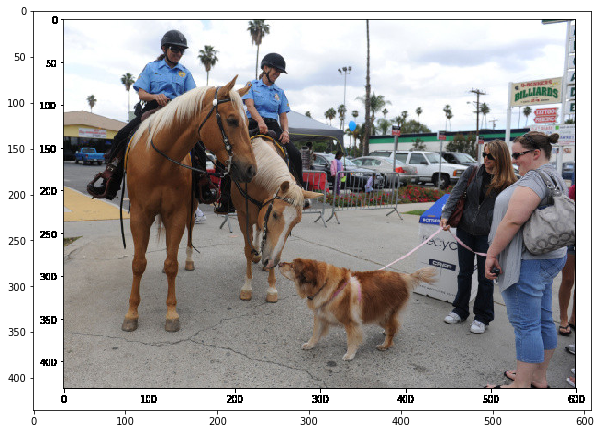

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

In [0]:

def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage
# l''image précédante est l'originale
# passons à l'image traitée par détection d'objet
#boxing pren comme données l'image traitée et le résultat 'predictions' de la détection faire sur l'image initiale


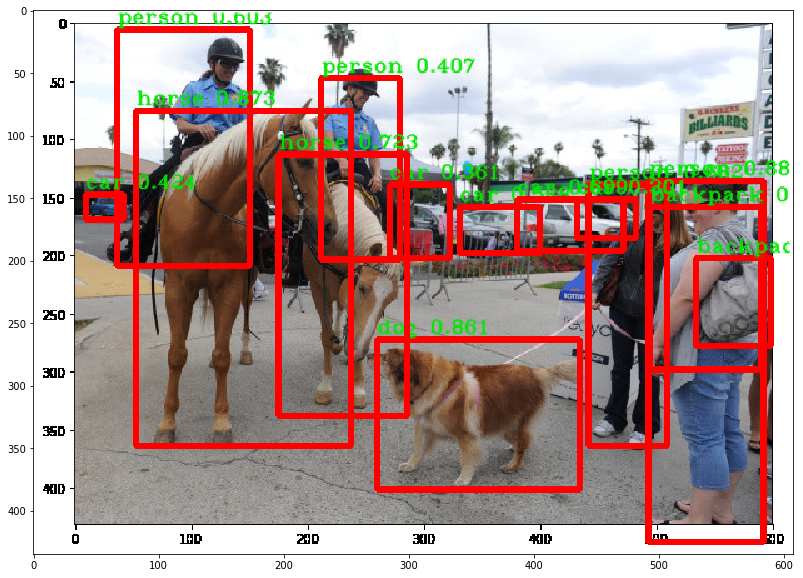

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [19]:
#chargement dde la video
from google.colab import files
file = files.upload()

Saving messi.mp4 to messi.mp4


In [20]:
!ls -l

total 26012
-rw-r--r-- 1 root root   455166 Jul  3 16:24 before.png
drwxr-xr-x 5 root root     4096 Jul  3 16:21 bin
drwxr-xr-x 4 root root     4096 Jul  3 16:09 build
drwxr-xr-x 4 root root     4096 Jul  3 16:09 cfg
drwxr-xr-x 7 root root     4096 Jul  3 16:09 darkflow
drwxr-xr-x 2 root root     4096 Jul  3 16:09 darkflow.egg-info
-rw-r--r-- 1 root root 14900940 Jul  3 16:09 demo.gif
-rwxr-xr-x 1 root root       94 Jul  3 16:09 flow
-rw-r--r-- 1 root root       27 Jul  3 16:09 labels.txt
-rw-r--r-- 1 root root    35141 Jul  3 16:09 LICENSE
-rw-r--r-- 1 root root 10898910 Jul  3 16:30 messi.mp4
-rw-r--r-- 1 root root   283380 Jul  3 16:09 preview.png
-rw-r--r-- 1 root root    11539 Jul  3 16:09 README.md
drwxr-xr-x 2 root root     4096 Jul  3 16:09 sample_img
-rw-r--r-- 1 root root     2575 Jul  3 16:09 setup.py
drwxr-xr-x 3 root root     4096 Jul  3 16:09 test


In [0]:
cap = cv2.VideoCapture('messi.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
from google.colab.patches import cv2_imshow
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(width), int(height)))
cv2.destroyAllWindows()

results=[]

while(True):
    # Capture frame-by-frame
   ret, frame = cap.read()
    
   if ret == True:
        frame = np.asarray(frame)
        results = tfnet.return_predict(frame)
        
        new_frame = boxing(frame, results)
        
        # Display the resulting frame
        out.write(new_frame)
        
        #cv2.imshow('frame',new_frame)
        #cv2_imshow('frame')
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
   else:
        break

# When everything done, release the capture
cap.release()
out.release()



# et voilà ...

In [0]:
#activer la cellule pour downloader le fichier annoté
from google.colab import files
files.download('/content/darkflow/output.avi')